# Pymaceuticals Inc.
---

### Analysis

Introduction:
The analysis examines the effectiveness of different treatment regimens in reducing tumor sizes in mice using a comprehensive dataset.

Brief Analysis:
The study finds that Capomulin and Ramicane are the most effective treatments, with Capomulin demonstrating the highest survival rate and second-lowest median tumor volume. Ramicane exhibits slightly lower survival rates but is the most effective in reducing tumor volume. Gender does not appear to influence treatment efficacy. Final tumor volume measurements show differences between Capomulin and Ramicane-treated mice, with Ramicane consistently reducing tumor size. Additionally, a direct relationship between body weight and tumor volume is observed among mice treated with Capomulin. Further studies are warranted to conclusively determine the effectiveness of Capomulin and Ramicane treatment

=====================================================================================================================

***Detailed analysis in the report.
 

In [2]:
%matplotlib widget

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID",how='left')

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [1]:
#To Compare the results
#--------------------------------------

# # Dependencies and Setup
# import matplotlib.pyplot as plt
# import pandas as pd
# import scipy.stats as st

# # Study data files
# mouse_metadata_path = "data/Mouse_metadata.csv"
# study_results_path = "data/Study_results.csv"

# # Read the mouse data and the study results
# mouse_metadata = pd.read_csv(mouse_metadata_path)
# study_results = pd.read_csv(study_results_path)

# # Combine the data into a single DataFrame
# combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.

len(combined_data["Mouse ID"].unique())

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False), 'Mouse ID'].unique()

print("Duplicate mice IDs:")
duplicate_mice

Duplicate mice IDs:


array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = combined_data.loc[combined_data['Mouse ID'].isin(duplicate_mice)]

print("Data for duplicate mouse IDs:")
duplicate_mouse_data

Data for duplicate mouse IDs:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Verify the clean DataFrame
print("Clean DataFrame after dropping duplicates:")
clean_data.head()

Clean DataFrame after dropping duplicates:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:

# Checking the number of mice in the clean DataFrame
num_mice_clean = clean_data['Mouse ID'].nunique()
print(f"There are {num_mice_clean} mice in the clean DataFrame.")


There are 249 mice in the clean DataFrame.


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.


summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

#print the results

summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg =  clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

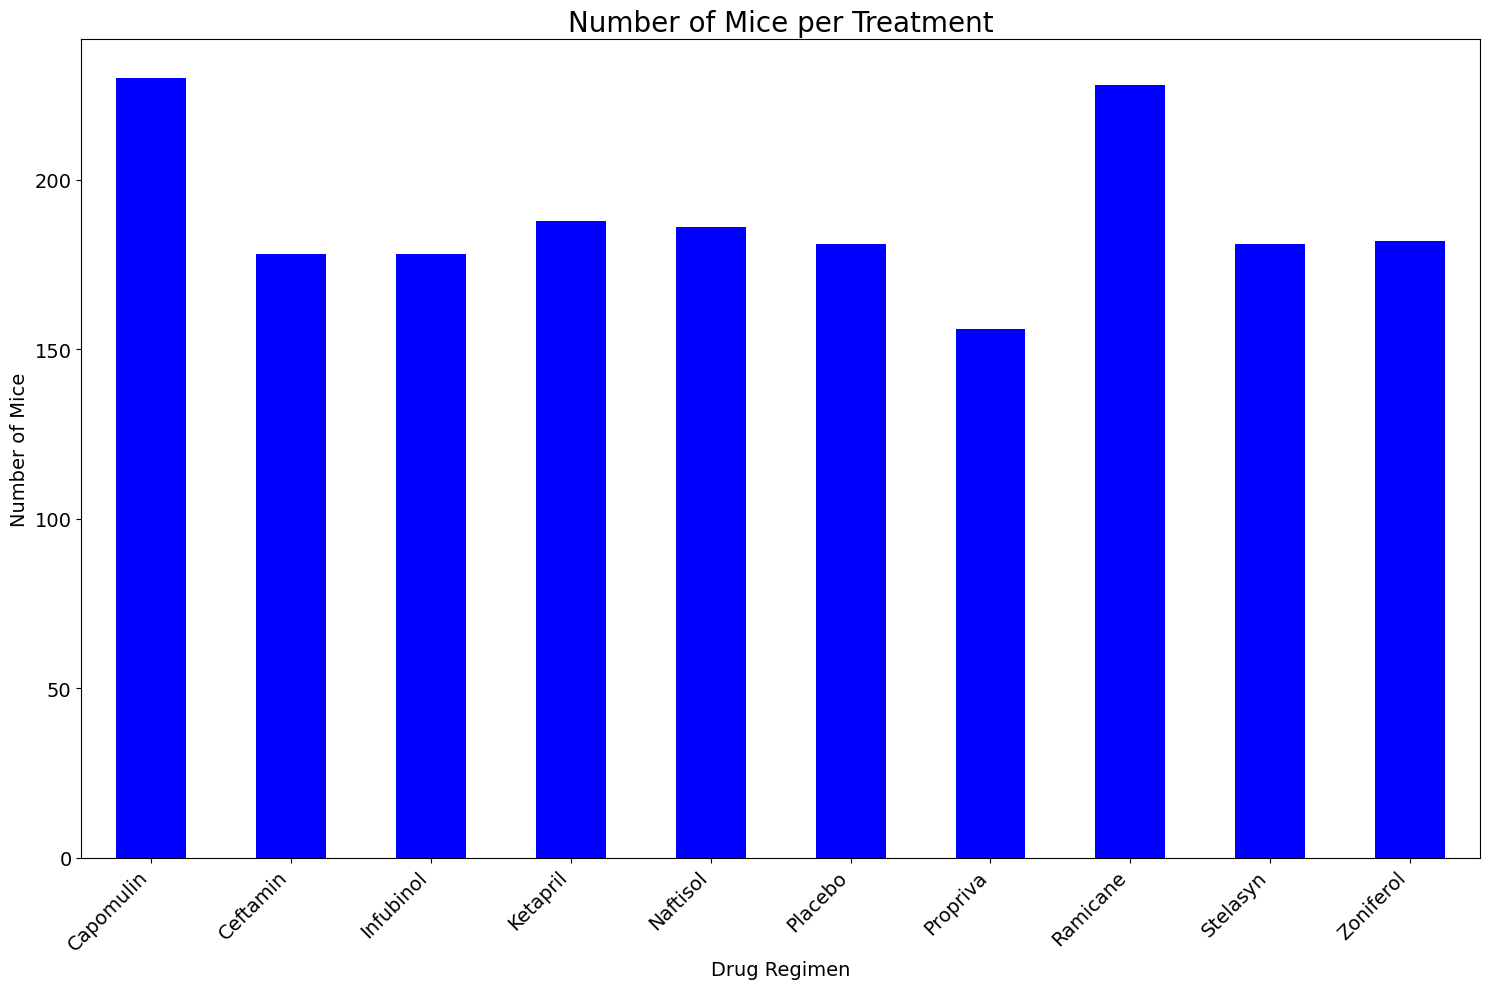

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [13]:


# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


# Count the number of mice per treatment regimen
count_mice_per_tret = clean_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 

# Create a new figure
plt.figure(figsize=(15, 10))

# Create a bar plot using Pandas
plot_pandas = count_mice_per_tret.plot(kind='bar', figsize=(15,10), color='b', fontsize=14)

# Set the labels and title
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Number of Mice", fontsize=14)
plt.title("Number of Mice per Treatment", fontsize=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the plot
plt.savefig("../Pymaceuticals/Pan_mice_per_treat.png", bbox_inches="tight")

# Show the plot
plt.tight_layout()
plt.show()

# Display the count of mice per treatment regimen
count_mice_per_tret

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#  Create an array that contains the number of mice each drug regimen has

# Count the number of mice per treatment regimen
mice_list = clean_data.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()

# Display the list of mice counts per treatment regimen
mice_list

[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

In [15]:
import numpy as np

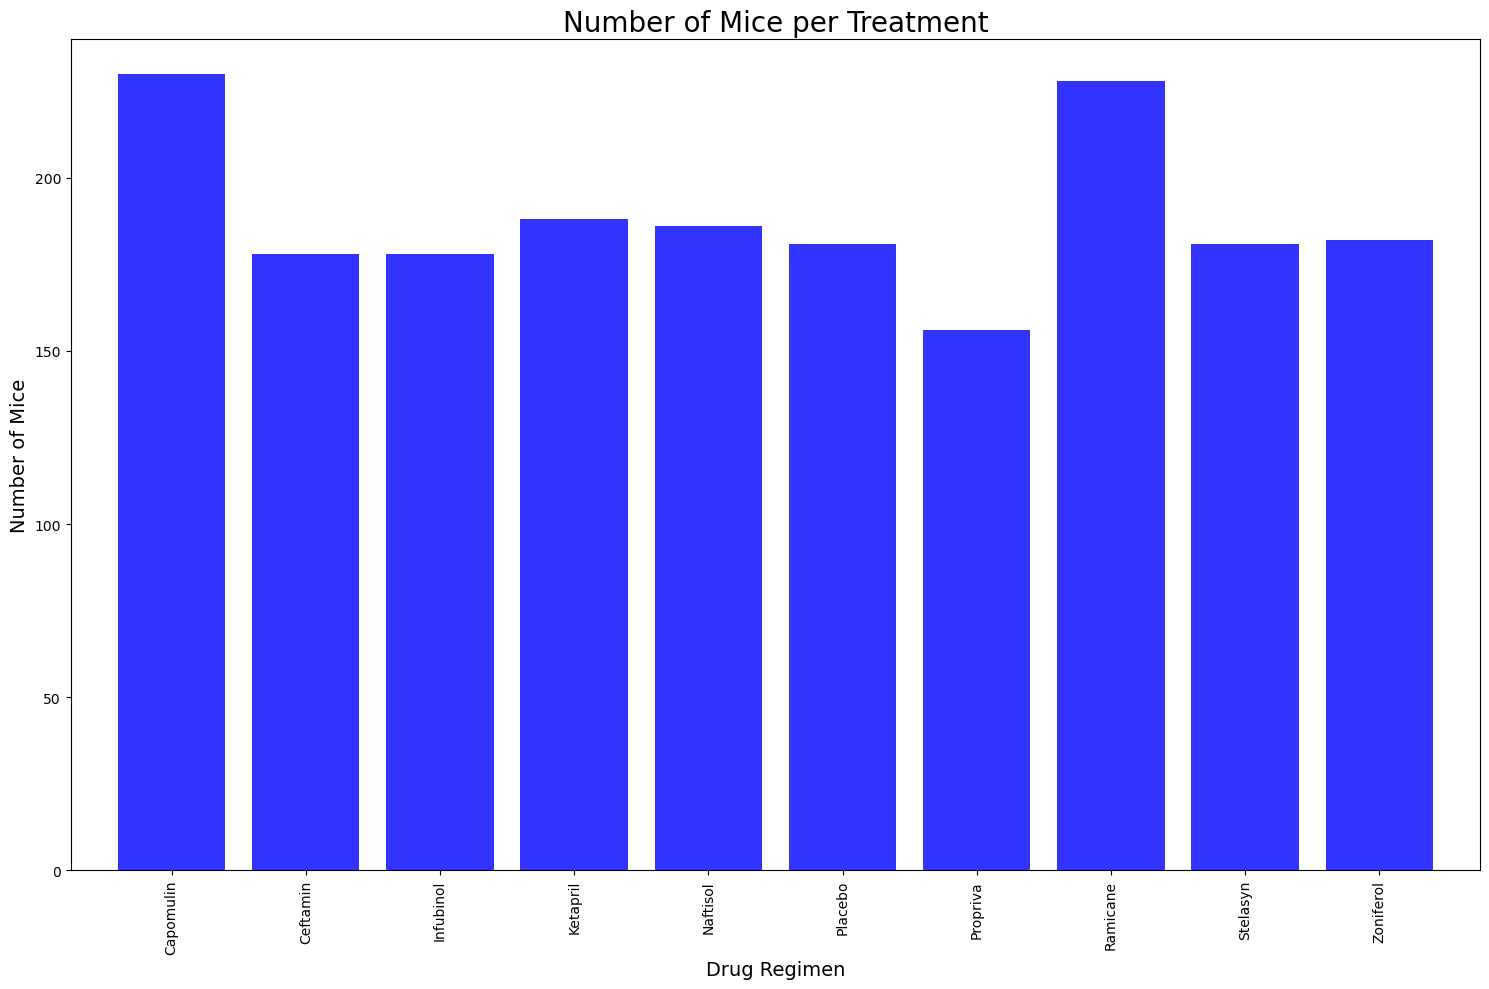

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = np.arange(len(count_mice_per_tret))

# Create a new figure
plt.figure(figsize=(15, 10))

# Create the bar plot
plt.bar(x_axis, mice_list, color='b', alpha=0.8, align='center')

# Set tick locations and labels
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation='vertical')

# Set the x and y limits
plt.xlim(-0.75, len(x_axis) - 0.25)
plt.ylim(0, max(mice_list) + 10)

# Set the title and labels
plt.title("Number of Mice per Treatment", fontsize=20)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Number of Mice", fontsize=14)

# Save the plot
plt.savefig("../Pymaceuticals/mat_mice_per_treat.png", bbox_inches="tight")

# Show the plot
plt.tight_layout()
plt.show()

Pie Graph (Style-1) Using Pie pandas (Extended version)

In [21]:
#  Group by gender and get the number to plot
# Group by gender and get the number to plot
groupby_gender = clean_data.groupby(["Mouse ID", "Sex"])
gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# Calculate and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100 * (mouse_gender["Total Count"] / mouse_gender["Total Count"].sum()))
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"].map("{:.2f}%".format)

# Display the dataframe
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.80%
Male,125,50.20%


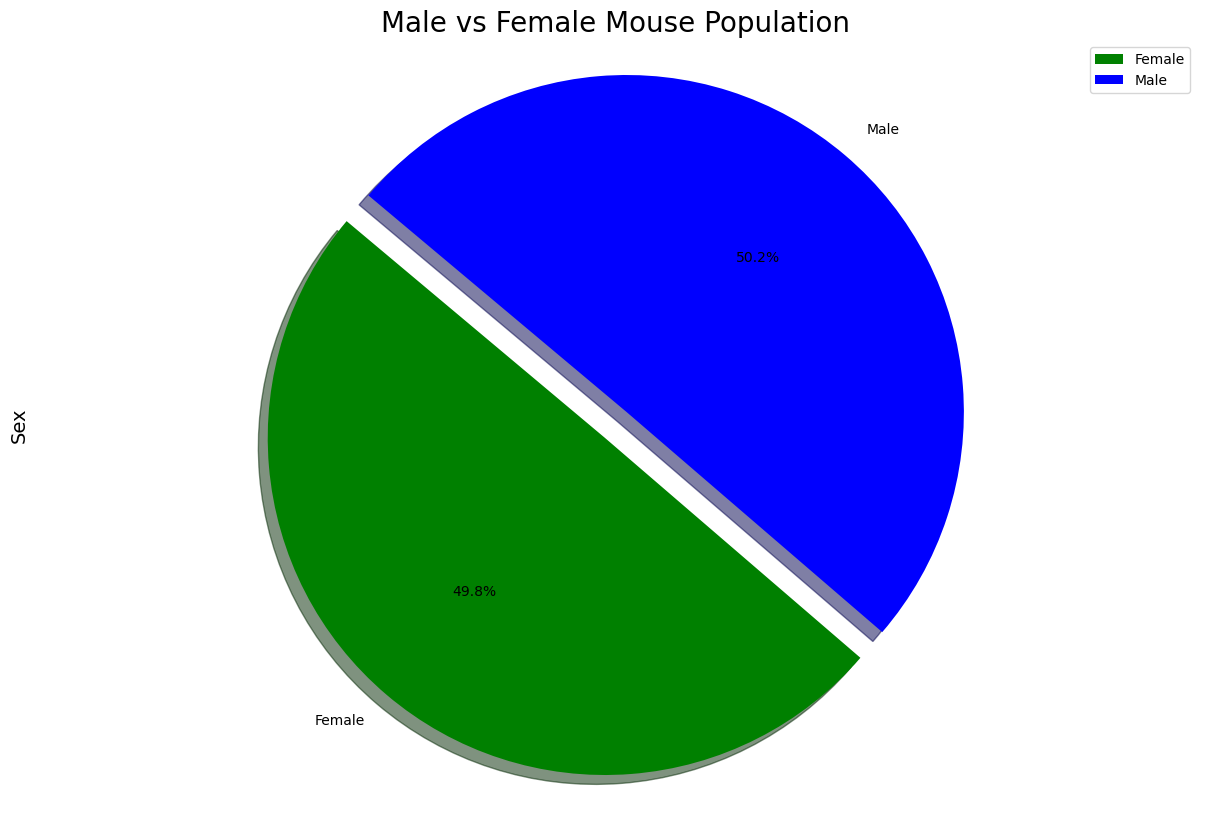

In [23]:
# Define colors and explode for the pie plot
colors = ['green', 'blue']
explode = (0.1, 0)

# Generate the pie plot showing the distribution of female versus male mice
plot = mouse_gender.plot.pie(y='Total Count', figsize=(15, 10), colors=colors, startangle=140, explode=explode, shadow=True, autopct="%1.1f%%")

# Set title and labels
plt.title('Male vs Female Mouse Population', fontsize=20)
plt.ylabel('Sex', fontsize=14)
plt.axis("equal")  # Remove fontsize, not a valid argument for axis

# Save the plot
plt.savefig("../Pymaceuticals/pi_pandas.png", bbox_inches="tight")

# Show the plot
plt.show()

Pie Graph (Style-1) Using Pie pandas (Simple version)

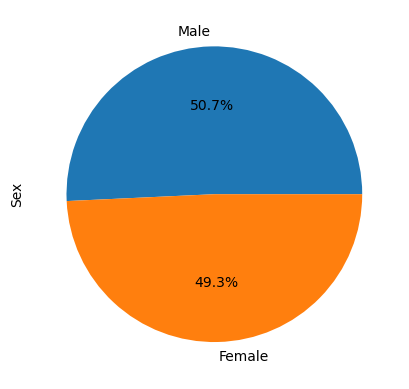

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = clean_data["Sex"].value_counts()
counts.plot(kind="pie",autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

Pie Graph (Style-2) Using Plt.pie (Extended version)

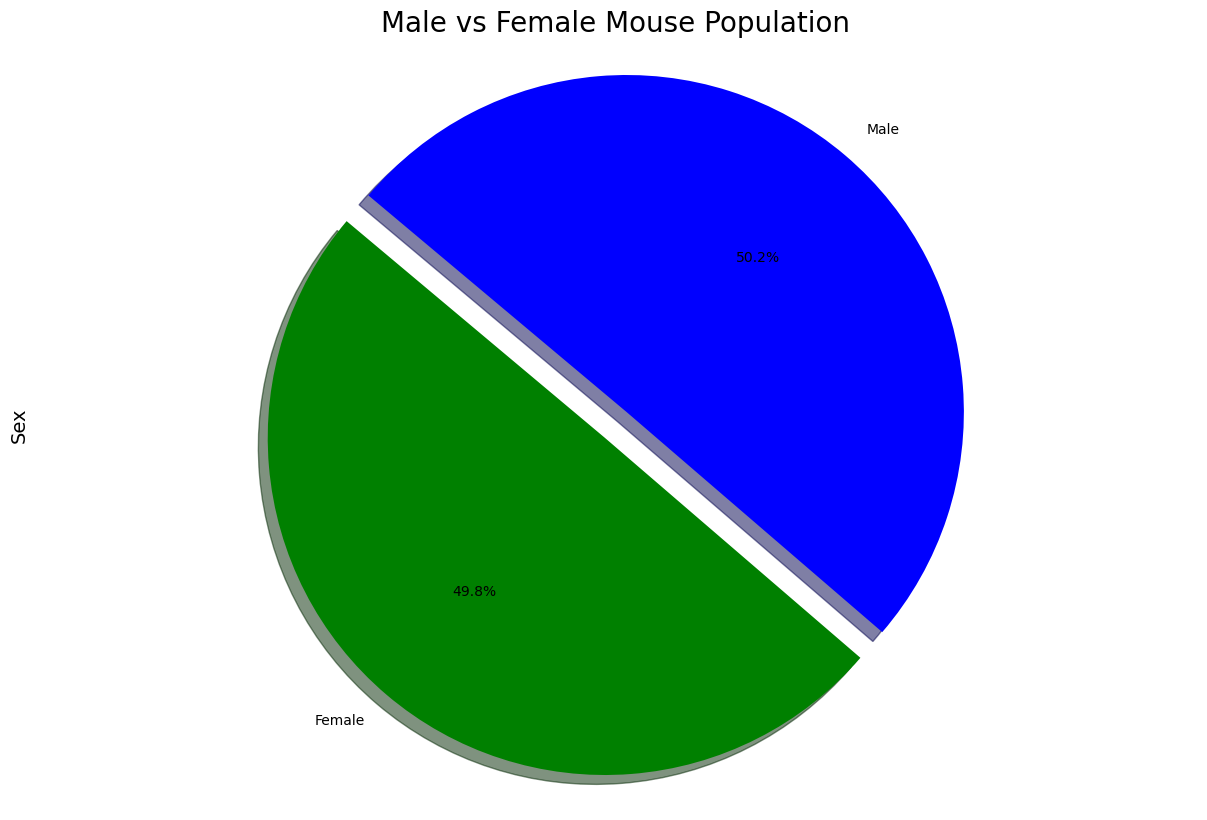

In [24]:
# Create Labels for the sections of the pie
labels = ["Female", "Male"]

# List the values of each section of the pie chart
sizes = [49.799197, 50.200803]

# Set colors for each section of the pie
colors = ['green', 'blue']

# Determine which section of the circle to detach
explode = (0.1, 0)

# Create the pie chart based upon the values
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Male vs Female Mouse Population', fontsize=20)
plt.ylabel('Sex', fontsize=14)

# Set equal axis
plt.axis("equal")

# Save the plot
plt.savefig("../Pymaceuticals/pi_plot.png", bbox_inches="tight")
plt.show()

Pie Graph (Style-2) Using Plt.pie (Simple version)

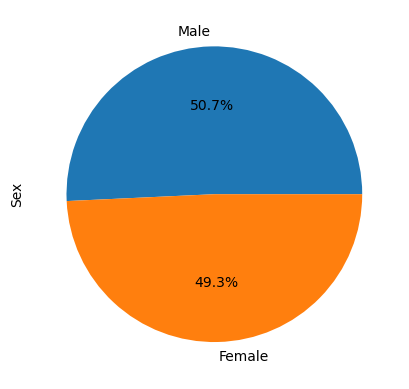

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts.values,labels=counts.index.values,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:


# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Drugs = clean_data[(clean_data["Drug Regimen"] == "Ceftamin")|
                          (clean_data["Drug Regimen"] == "Infubinol")|
                          (clean_data["Drug Regimen"] == "Ramicane")|
                          (clean_data["Drug Regimen"] == "Capomulin")
                         ]
lastTimepoint = Drugs.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
MergedDF = pd.merge(lastTimepoint,clean_data, on=["Mouse ID", "Timepoint"], how="left")
MergedDF.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [27]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


# Put treatments into a list for for loop (and later for plot labels)
drugList = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVolData = []
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for d in drugList:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorVolume = MergedDF.loc[MergedDF["Drug Regimen"] == d, :]
    
    # add subset 
    tumorVolData.append(tumorVolume["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorVolume["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    iqr = quartiles[0.75]-quartiles[0.25]
    
    lowerbound = quartiles[0.25]-(1.5*iqr)
    upperbound = quartiles[0.75]+(1.5*iqr)

    outliers = tumorVolume.loc[(tumorVolume["Tumor Volume (mm3)"] > upperbound) | 
                                (tumorVolume["Tumor Volume (mm3)"] < lowerbound)]
    print(f"{d}'s the potential outliers are: \n\t{outliers}")

Capomulin's the potential outliers are: 
	Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Ramicane's the potential outliers are: 
	Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Infubinol's the potential outliers are: 
	   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
15     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
15  Female          18          25  
Ceftamin's the potential outliers are: 
	Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volumes = pd.DataFrame()

# Loop through each drug in the list
for drug in drug_list:
    # Filter the dataframe for the current drug
    drug_data = combined_data[combined_data["Drug Regimen"] == drug]
    
    # Group by Mouse ID and get the last (greatest) timepoint for each mouse
    last_timepoint = drug_data.groupby("Mouse ID")["Timepoint"].max()
    
    # Merge with the original dataframe to get the tumor volume at the last timepoint
    merged_data = pd.merge(last_timepoint, drug_data, on=["Mouse ID", "Timepoint"], how="inner")
    
    # Concatenate the merged data to the final tumor volumes dataframe
    final_tumor_volumes = pd.concat([final_tumor_volumes, merged_data])

# Calculate potential outliers using the IQR method
for drug in drug_list:
    quartiles = final_tumor_volumes[final_tumor_volumes["Drug Regimen"] == drug]["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = final_tumor_volumes[(final_tumor_volumes["Drug Regimen"] == drug) & ((final_tumor_volumes["Tumor Volume (mm3)"] < lower_bound) | (final_tumor_volumes["Tumor Volume (mm3)"] > upper_bound))]
    
    print(f"----------------------------------")
    print(f"Results for {drug}:")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential outliers:")
    print(outliers)
    print(f"----------------------------------")


----------------------------------
Results for Capomulin:
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
----------------------------------
----------------------------------
Results for Ramicane:
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
----------------------------------
----------------------------------
Results for Infubinol:
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential outliers:
  Mouse I

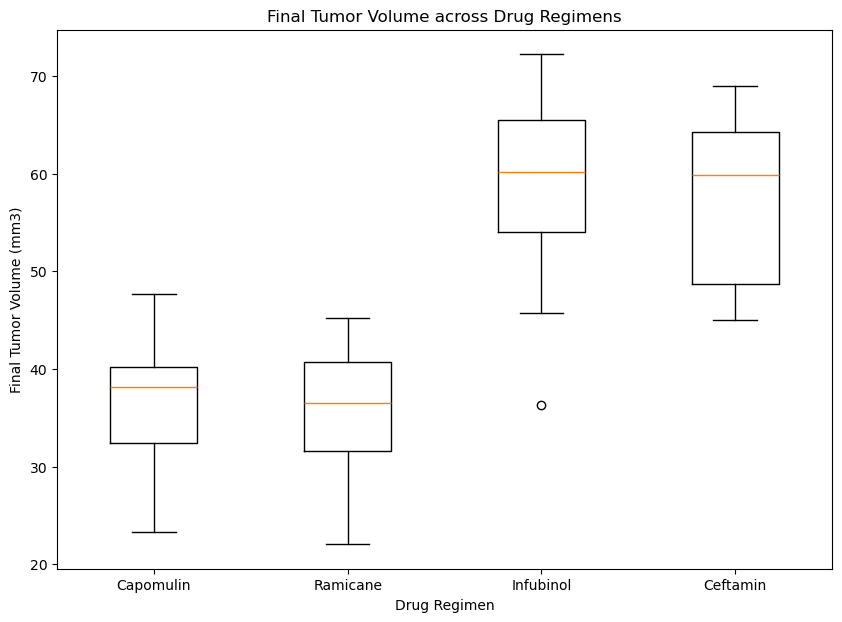

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(10, 7))

# Customize labels and title
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_title('Final Tumor Volume across Drug Regimens')

# Create the boxplot
ax1.boxplot(tumorVolData, labels=drugList)

# Show the plot
plt.show()

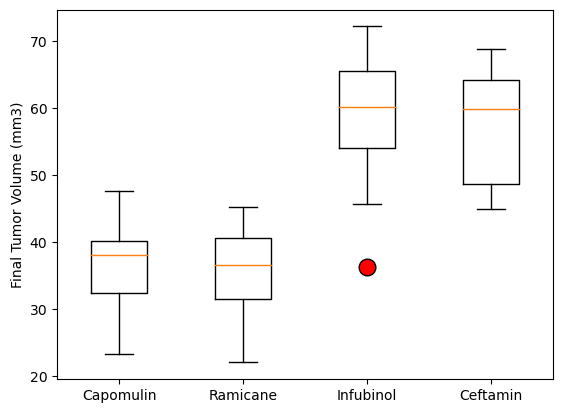

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

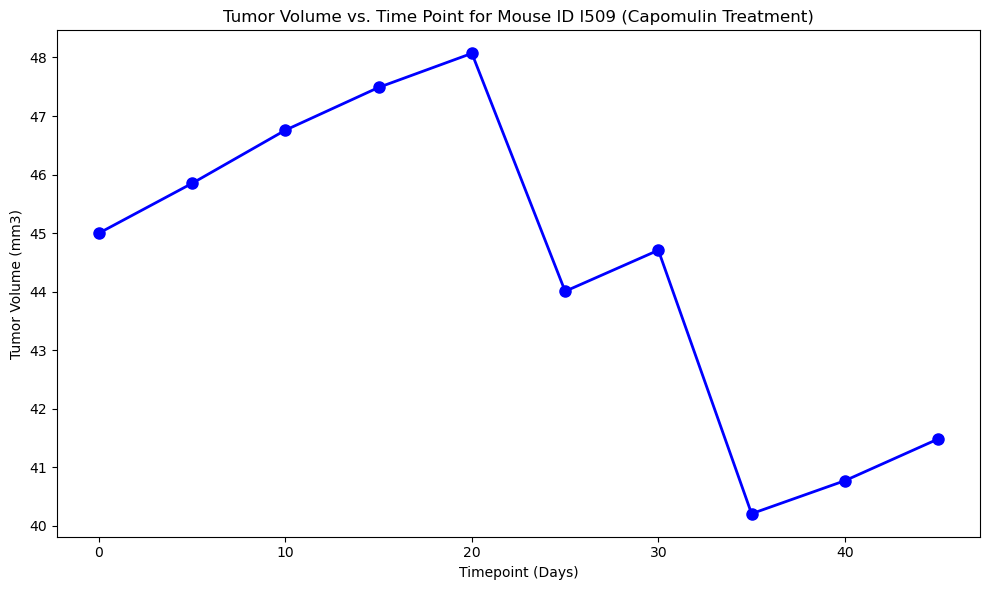

In [30]:
# Filter the dataframe for a specific mouse treated with Capomulin
mouse_data_capomulin = combined_data[(combined_data["Drug Regimen"] == "Capomulin") & (combined_data["Mouse ID"] == "l509")]

# Extract timepoint and tumor volume data
x_axis = mouse_data_capomulin["Timepoint"]
tumor_volume = mouse_data_capomulin["Tumor Volume (mm3)"]

# Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(x_axis, tumor_volume, marker='o', color='blue', linewidth=2, markersize=8)

# Add labels and title
plt.title('Tumor Volume vs. Time Point for Mouse ID l509 (Capomulin Treatment)')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.tight_layout()
plt.show()

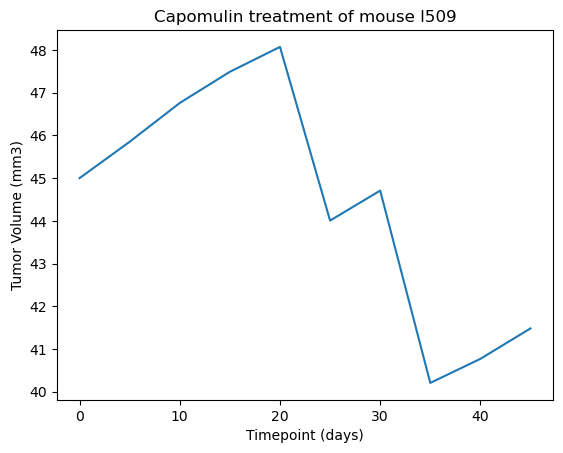

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


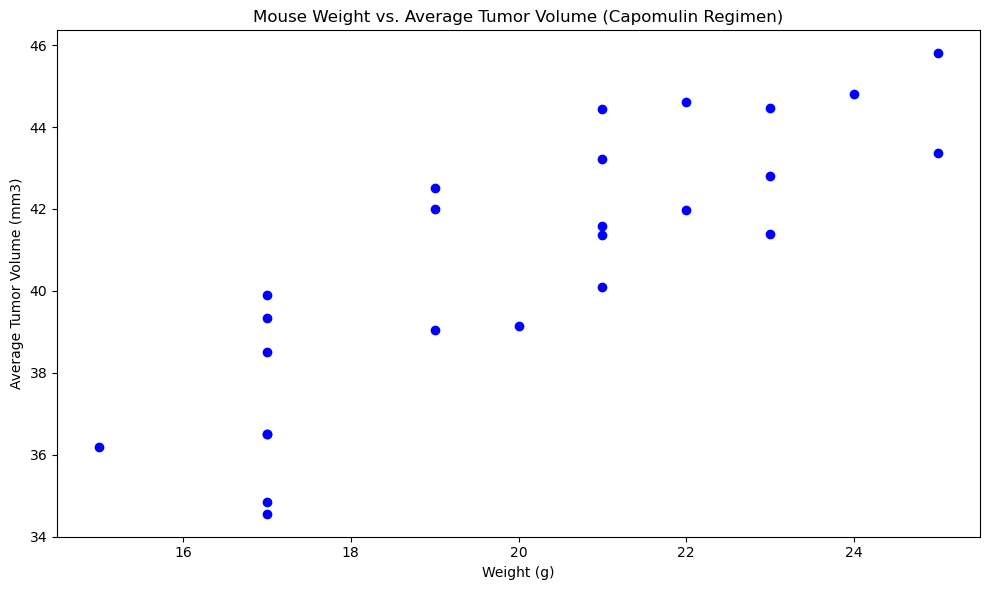

In [31]:
# Filter the dataframe for the Capomulin regimen
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding weight for each mouse
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', color='blue')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot

plt.tight_layout()
plt.show()


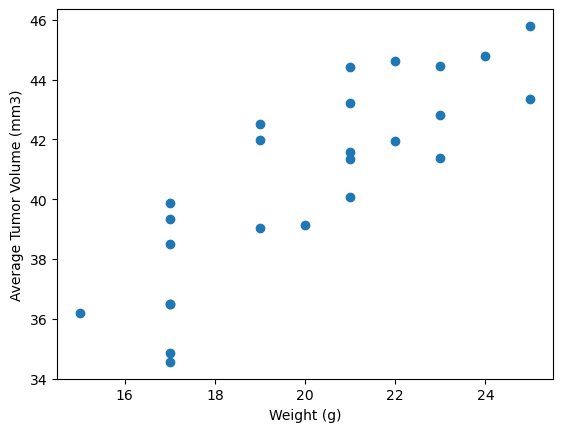

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

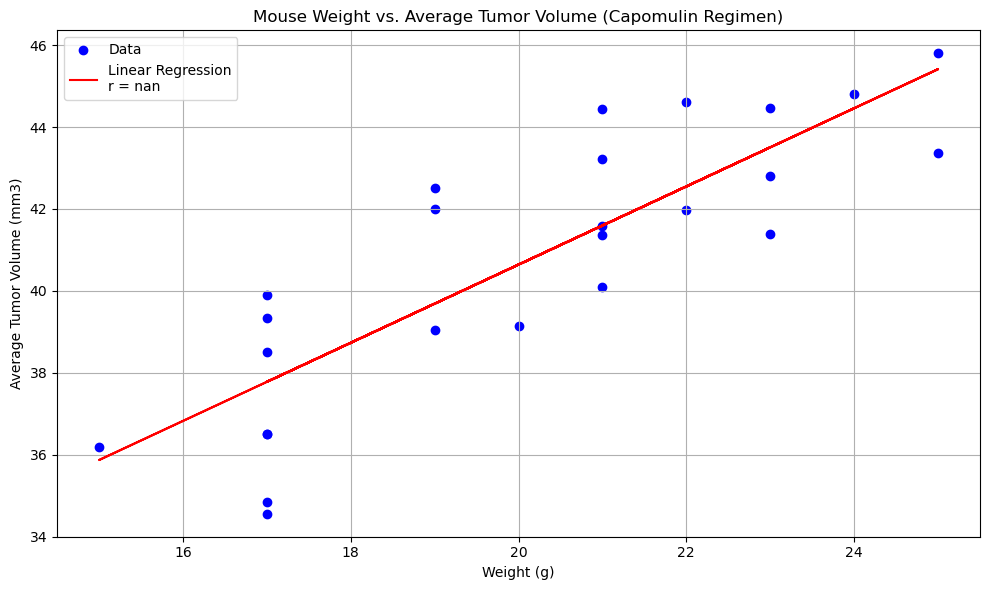

In [32]:
from scipy.stats import linregress

# Calculate the correlation coefficient
correlation_coefficient = capomulin_data.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].corr().iloc[0::2,-1].mean()

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_volume)

# Get the regression values
regress_values = mouse_weight * slope + intercept

# Generate the scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', color='blue', label='Data')
plt.plot(mouse_weight, regress_values, color='red', label=f'Linear Regression\nr = {correlation_coefficient:.2f}')
plt.legend()

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


The correlation between mouse weight and the average tumor volume is 0.84


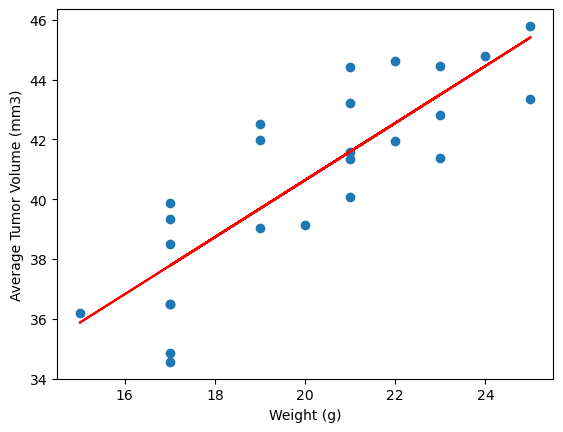

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
